In [21]:
### Bibliotecas básicas de gestión de datos
import pandas as pd
import numpy as np
from sklearn import preprocessing

### Bibliotecas gráficas
import matplotlib.pyplot as plt
import seaborn as sns 

### Utilidades Scikit-learn 
from sklearn.model_selection import train_test_split

### Métricas
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, auc

### Modelos
from xgboost import XGBClassifier, plot_importance

import astropy.units as u
import astropy.units.astrophys as ua

from sklearn.preprocessing import MinMaxScaler
########################################################
### Para un flujo de trabajo más rápido, las bibliotecas de Interpretabilidad
### se instalarán/cargarán sobre la marcha del tutorial
########################################################

### Add-ons adicionales
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
%matplotlib inline

In [6]:
#pip install pandas

In [5]:
#pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
#pip install requests

     ---------------------------------------- 62.8/62.8 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 96.5/96.5 kB ? eta 0:00:00
     -------------------------------------- 140.6/140.6 kB 8.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [7]:
#pip install matplotlib

  Using cached matplotlib-3.6.3-cp39-cp39-win_amd64.whl (7.2 MB)
  Using cached kiwisolver-1.4.4-cp39-cp39-win_amd64.whl (55 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
     -------------------------------------- 160.2/160.2 kB 4.8 MB/s eta 0:00:00
  Using cached Pillow-9.4.0-cp39-cp39-win_amd64.whl (2.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [8]:
#pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
#pip install xgboost


  Using cached xgboost-1.7.3-py3-none-win_amd64.whl (89.1 MB)


In [10]:
#pip install astropy

  Using cached astropy-5.2.1-cp39-cp39-win_amd64.whl (6.6 MB)
  Using cached PyYAML-6.0-cp39-cp39-win_amd64.whl (151 kB)
  Using cached pyerfa-2.0.0.1-cp39-cp39-win_amd64.whl (366 kB)
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install numpy==1.22.4

  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.1
    Uninstalling numpy-1.24.1:
      Successfully uninstalled numpy-1.24.1
Note: you may need to restart the kernel to use updated packages.


In [22]:

### Modelos
from xgboost import XGBClassifier, plot_importance
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Módulos sklearn para métricas de rendimiento
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

# Módulos sklearn para selección de modelo de ML
from sklearn import model_selection
from sklearn.model_selection import train_test_split  # import 'train_test_split'
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



from sklearn.metrics import mean_squared_error


In [2]:
#pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [23]:
# Cargamos el txt, señalando que el separador son ","
df_exoplanetas = pd.read_csv(r"exoplanetas.txt", sep=",")

In [24]:
df_new_exoplanets=df_exoplanetas[['name','binaryflag','mass','radius','temperature','eccentricity','period','discoverymethod','discoveryyear','lastupdate','system_rightascension','system_declination','hoststar_temperature','system_distance', 'hoststar_mass', 'hoststar_radius']]

In [25]:
df_new_exoplanets.drop('discoverymethod',axis=1).isna().sum()

name                        1
binaryflag                  0
mass                     2633
radius                   1248
temperature              3691
eccentricity             3152
period                    270
discoveryyear               9
lastupdate                  5
system_rightascension       9
system_declination          9
hoststar_temperature      544
system_distance           224
hoststar_mass             292
hoststar_radius           594
dtype: int64

### Análisis univariante 1º

In [26]:
# Extrayendo nuestra variable objetivo 'Outcome'
# y creando una lista de características útiles de las variables dependientes
target = 'discoverymethod'
features_list = list(df_new_exoplanets.columns)
features_list.remove(target)
print(features_list)

['name', 'binaryflag', 'mass', 'radius', 'temperature', 'eccentricity', 'period', 'discoveryyear', 'lastupdate', 'system_rightascension', 'system_declination', 'hoststar_temperature', 'system_distance', 'hoststar_mass', 'hoststar_radius']


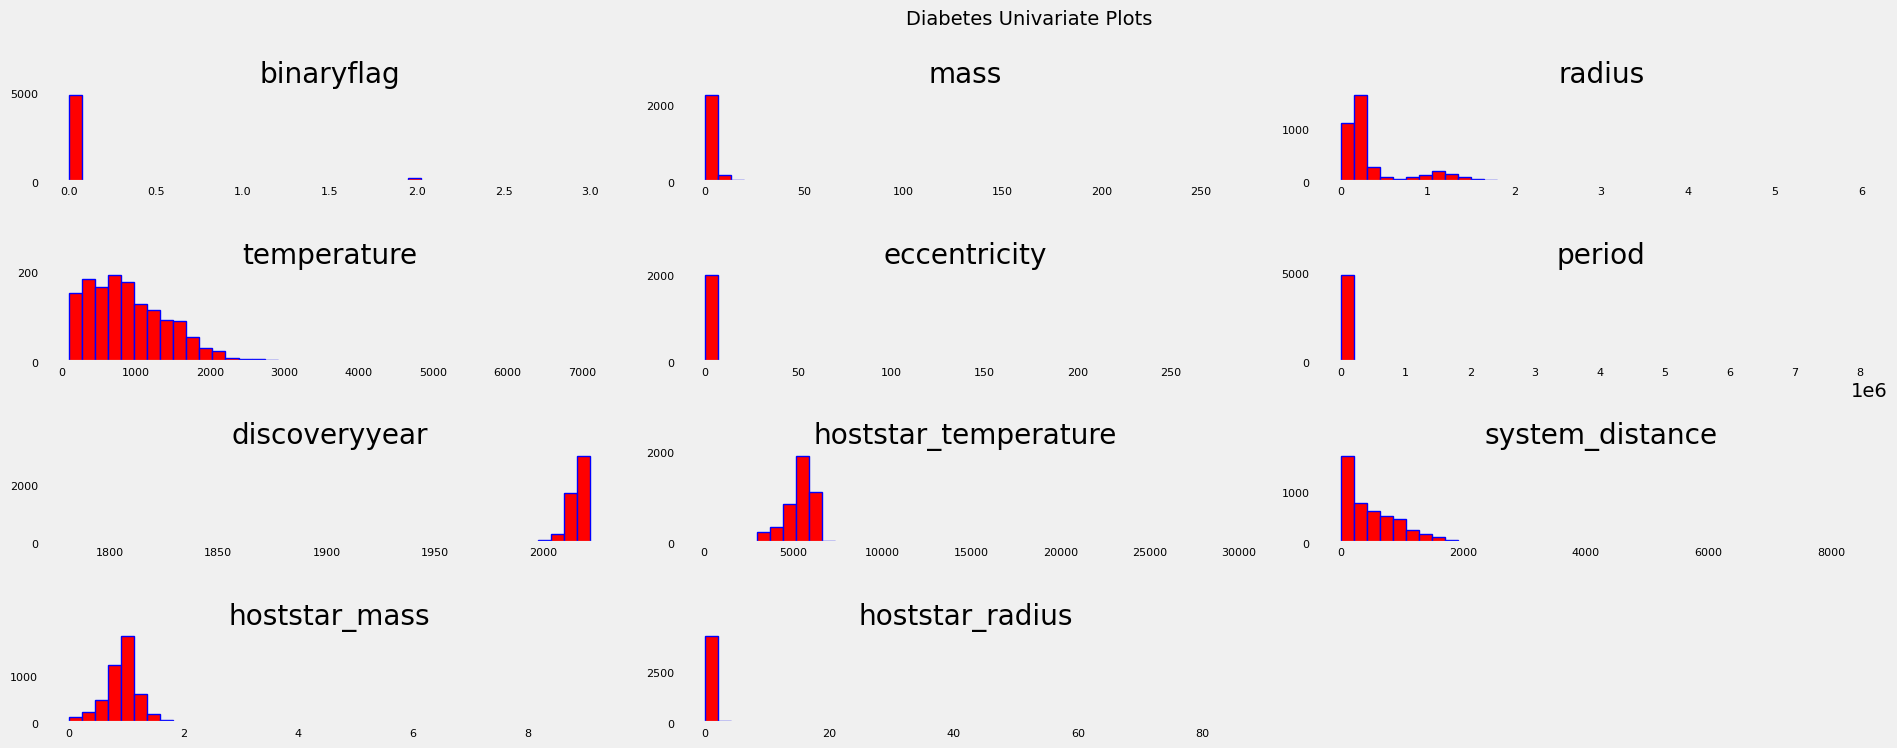

In [27]:
df_new_exoplanets[features_list].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(16,6), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Diabetes Univariate Plots', x=0.65, y=1.25, fontsize=14); 

In [28]:
df_new_exoplanets.drop('discoverymethod',axis=1).isin([0]).sum()

name                        0
binaryflag               4903
mass                        0
radius                      0
temperature                 0
eccentricity              533
period                      0
discoveryyear               0
lastupdate                  0
system_rightascension       0
system_declination          0
hoststar_temperature        0
system_distance             0
hoststar_mass               0
hoststar_radius             0
dtype: int64

In [29]:
df_new_exoplanets.dtypes

name                      object
binaryflag                 int64
mass                     float64
radius                   float64
temperature              float64
eccentricity             float64
period                   float64
discoverymethod           object
discoveryyear            float64
lastupdate                object
system_rightascension     object
system_declination        object
hoststar_temperature     float64
system_distance          float64
hoststar_mass            float64
hoststar_radius          float64
dtype: object

In [30]:
df_new_exoplanets_filtro=df_new_exoplanets.copy()

In [31]:
df_new_exoplanets_filtro.columns

Index(['name', 'binaryflag', 'mass', 'radius', 'temperature', 'eccentricity',
       'period', 'discoverymethod', 'discoveryyear', 'lastupdate',
       'system_rightascension', 'system_declination', 'hoststar_temperature',
       'system_distance', 'hoststar_mass', 'hoststar_radius'],
      dtype='object')

In [32]:
columns=['mass','radius','eccentricity','period','hoststar_temperature','system_distance', 'hoststar_mass', 'hoststar_radius']

In [33]:
for col in columns:
    df_new_exoplanets_filtro[ col ] = df_new_exoplanets_filtro[ col ].fillna(value=np.mean(df_new_exoplanets_filtro[col]))
    
print(df_new_exoplanets_filtro)

               name  binaryflag     mass    radius  temperature  eccentricity  \
0       KOI-1843.03           0  0.00140  0.054000          NaN      0.288289   
1      Kepler-974 b           0  2.31145  0.140000          NaN      0.288289   
2       KOI-1843.02           0  2.31145  0.071000          NaN      0.288289   
3        Kepler-9 b           0  0.25000  0.840000        707.2      0.062600   
4        Kepler-9 c           0  0.17000  0.820000        557.9      0.068400   
...             ...         ...      ...       ...          ...           ...   
5135      eta Cet b           0  2.46000  0.401121          NaN      0.170000   
5136      eta Cet c           0  3.16000  0.401121          NaN      0.020000   
5137    HD 108874 b           0  1.36000  0.401121        256.8      0.070000   
5138    HD 108874 c           0  1.01800  0.401121        160.2      0.250000   
5139  Kepler-1473 b           0  2.31145  0.106000          NaN      0.288289   

           period discovery

In [15]:
df_new_exoplanets_filtro = df_new_exoplanets_filtro.dropna()

In [16]:
# Extrayendo nuestra variable objetivo 'Outcome'
# y creando una lista de características útiles de las variables dependientes
target = 'discoverymethod'
features_list = list(df_new_exoplanets_filtro.columns)
features_list.remove(target)
print(features_list)

['name', 'binaryflag', 'mass', 'radius', 'temperature', 'eccentricity', 'period', 'discoveryyear', 'lastupdate', 'system_rightascension', 'system_declination', 'hoststar_temperature', 'system_distance', 'hoststar_mass', 'hoststar_radius']


### Análisis univariante 

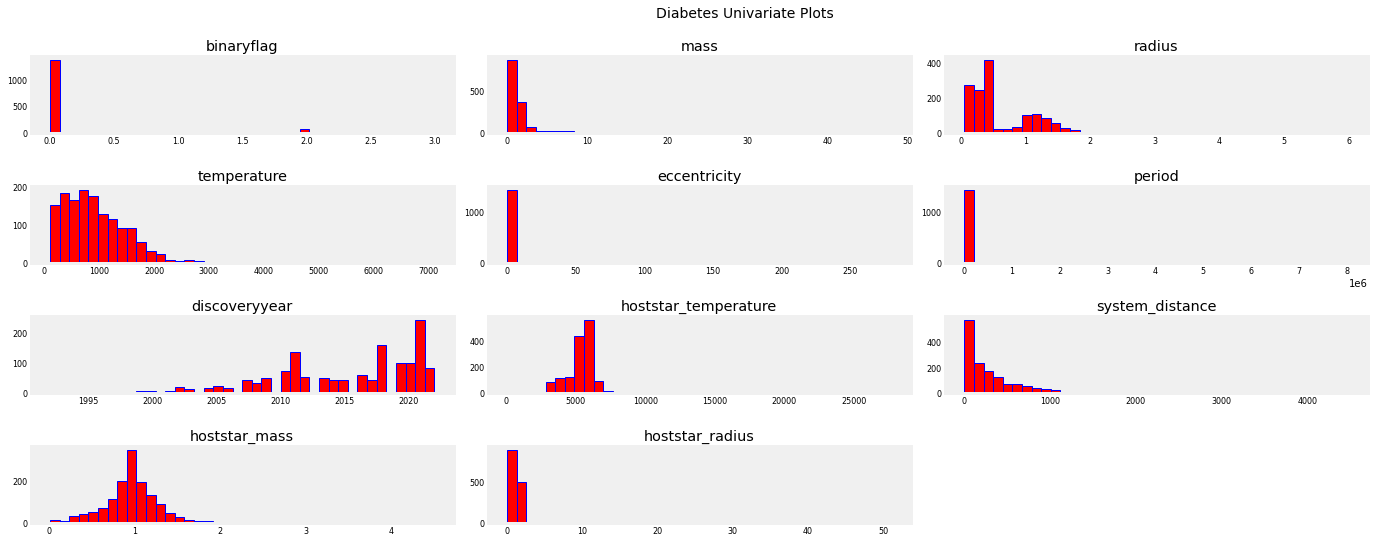

In [18]:
df_new_exoplanets_filtro[features_list].hist(bins=40, edgecolor='b', linewidth=1.0,
                          xlabelsize=8, ylabelsize=8, grid=False, 
                          figsize=(16,6), color='red')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Diabetes Univariate Plots', x=0.65, y=1.25, fontsize=14);  

In [19]:
df_new_exoplanets_filtro.isin([0]).sum()

name                        0
binaryflag               1372
mass                        0
radius                      0
temperature                 0
eccentricity              404
period                      0
discoverymethod             0
discoveryyear               0
lastupdate                  0
system_rightascension       0
system_declination          0
hoststar_temperature        0
system_distance             0
hoststar_mass               0
hoststar_radius             0
dtype: int64

### Distribución de Descubrimientos

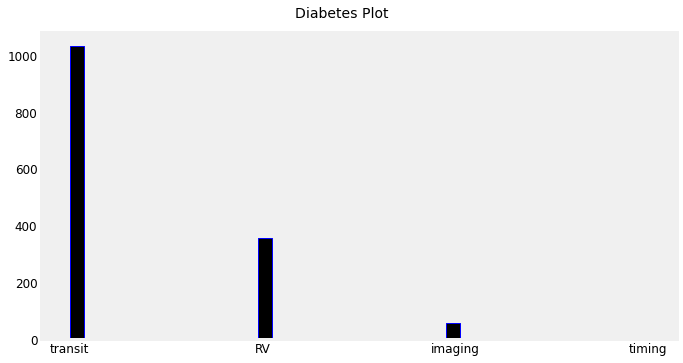

In [20]:
df_new_exoplanets_filtro[target].hist(bins=40, edgecolor='b', linewidth=1.0,
              xlabelsize=12, ylabelsize=12, grid=False, figsize=(8,4), color='black')    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))   
plt.suptitle('Diabetes Plot', x=0.6, y=1.25, fontsize=14); 

### Análisis multivariante

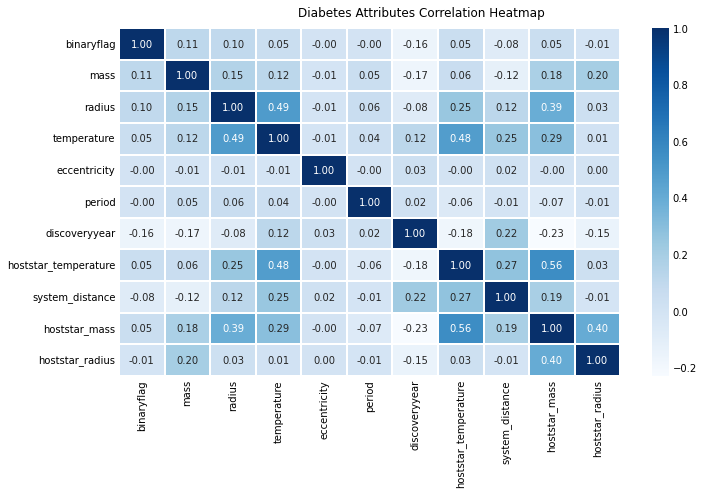

In [21]:
# Visualizamos las correlaciones
f, ax = plt.subplots(figsize=(10, 6))
corr = df_new_exoplanets_filtro.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="Blues",fmt='.2f',
            linewidths=.05)
f.subplots_adjust(top=0.93)
t = f.suptitle('Diabetes Attributes Correlation Heatmap', fontsize=12)

Las correlaciones 0,5 puede indicar algún tipo de relación entre dos variables. Por ejemplo,la temperatura del planeta
guarda relacion con su radio.
Poner relacion entre temperature y hoststart_temperature.
Poner relacion entre hoststar_mass y hoststart_temperature

### Características bivariadas frente al resultado

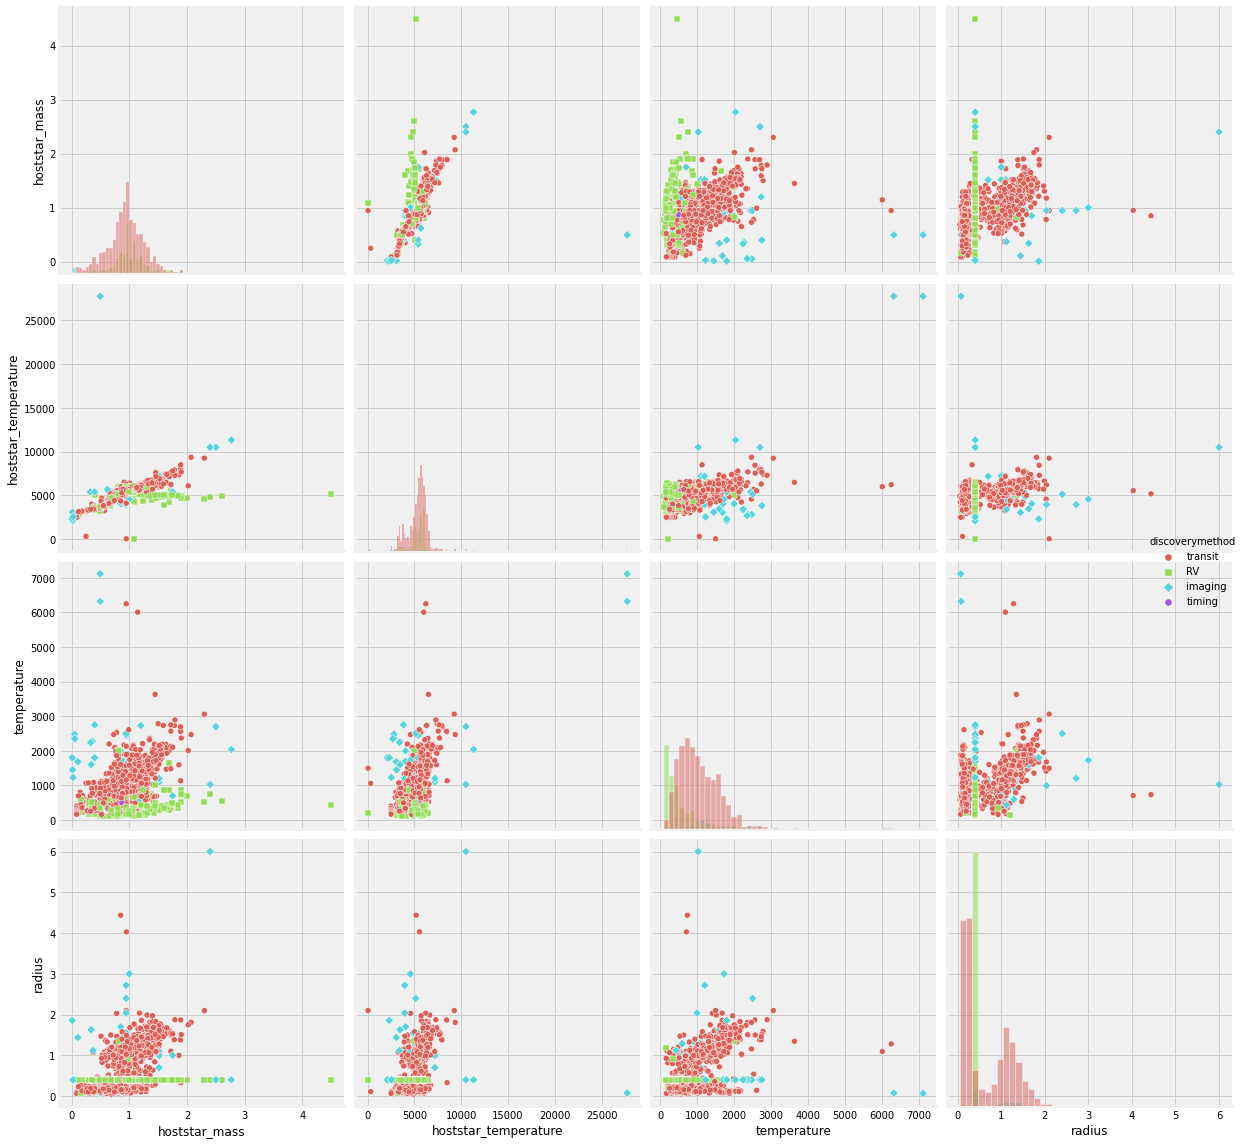

In [22]:
sns.pairplot( df_new_exoplanets_filtro, vars=[ 'hoststar_mass', 'hoststar_temperature', 'temperature', 'radius' ],
             size=4, diag_kind='hist', palette='hls', hue=target, markers=["o", "s", "D","o"])
plt.tight_layout()
plt
plt.show()

# Transformar datos

In [80]:
df_exoplanets_filtro = pd.read_csv(r"exoplanetas.txt", sep=",")

In [81]:
df_exoplanets_filtro.isna().sum()

name                        1
binaryflag                  0
mass                     2633
radius                   1248
period                    270
semimajoraxis            2569
eccentricity             3152
periastron               4227
longitude                5097
ascendingnode            5088
inclination              3625
temperature              3691
age                      5136
discoverymethod            10
discoveryyear               9
lastupdate                  5
system_rightascension       9
system_declination          9
system_distance           224
hoststar_mass             292
hoststar_radius           594
hoststar_metallicity     1531
hoststar_temperature      544
hoststar_age             4545
list                        0
dtype: int64

In [82]:
columns

['mass',
 'radius',
 'eccentricity',
 'period',
 'hoststar_temperature',
 'system_distance',
 'hoststar_mass',
 'hoststar_radius']

In [83]:
df_exoplanets_filtro = df_exoplanets_filtro.set_index('name', drop=True)

In [84]:
df_exoplanets_filtro = df_exoplanets_filtro.loc[(df_exoplanets_filtro['mass'].notnull()) & (df_exoplanets_filtro['radius'].notnull())].reindex()

In [85]:
df_exoplanets_filtro['RadiusSI'] = [(x*ua.jupiterRad).to(u.m).value for x in df_exoplanets_filtro['radius']]
df_exoplanets_filtro['RadiusKm'] = df_exoplanets_filtro['RadiusSI'] * 1E-3
df_exoplanets_filtro['MassSI'] = [(x*ua.jupiterMass).to(u.kg).value for x in df_exoplanets_filtro['mass']]
df_exoplanets_filtro['VolumeSI'] = 4/3 * np.pi * df_exoplanets_filtro['RadiusSI'] ** 3

# Calculate the density of each body
df_exoplanets_filtro['DensitySI'] = df_exoplanets_filtro['MassSI'] / df_exoplanets_filtro['VolumeSI']

In [86]:
earth_density = float(df_exoplanets_filtro.loc['Earth', 'DensitySI'])
saturn_density = df_exoplanets_filtro.loc['Saturn', 'DensitySI']

In [87]:
earth_density

5154.574875881941

In [88]:
newdf = df_exoplanets_filtro[["RadiusSI", "MassSI", "DensitySI",'mass','radius','eccentricity','period','hoststar_temperature','system_distance', 'hoststar_mass', 'hoststar_radius']]


In [89]:
columns=['mass','radius','eccentricity','period','hoststar_temperature','system_distance', 'hoststar_mass', 'hoststar_radius']
for col in columns:
    newdf[ col ] = newdf[ col ].replace( to_replace=np.nan, value=np.mean(newdf [col] ))

print(newdf)
cols = newdf[newdf.columns[newdf.columns != "DensitySI"]]

                  RadiusSI        MassSI     DensitySI    mass   radius  \
name                                                                      
KOI-1843.03   3.860568e+06  2.657374e+24  11025.810499  0.0014  0.05400   
Kepler-9 b    6.005328e+07  4.745311e+26    523.077354  0.2500  0.84000   
Kepler-9 c    5.862344e+07  3.226812e+26    382.358837  0.1700  0.82000   
Kepler-9 d    1.050932e+07  4.175874e+25   8588.838653  0.0220  0.14700   
WASP-124 b    8.865008e+07  1.138875e+27    390.256336  0.6000  1.24000   
...                    ...           ...           ...     ...      ...   
TOI-2257 b    1.399384e+07  3.397643e+25   2959.906871  0.0179  0.19574   
WASP-160 B b  7.792628e+07  5.276786e+26    266.212884  0.2780  1.09000   
HAT-P-21 b    7.320781e+07  7.712080e+27   4692.569572  4.0630  1.02400   
HAT-P-67 b    1.490608e+08  6.453624e+26     46.518372  0.3400  2.08500   
HAT-P-34 b    8.557592e+07  6.316959e+27   2406.382353  3.3280  1.19700   

              eccentrici

In [117]:
cols.columns.to_list()

,RadiusSI,MassSI,mass,radius,eccentricity,period,hoststar_temperature,system_distance,hoststar_mass,hoststar_radius
name,,,,,,,,,,
KOI-1843.03,3.860568e+06,2.657374e+24,0.0014,0.05400,0.07783,0.176891,3687.0,134.8330,0.520,0.500000
Kepler-9 b,6.005328e+07,4.745311e+26,0.2500,0.84000,0.06260,19.224180,5777.0,650.0000,1.070,1.020000
Kepler-9 c,5.862344e+07,3.226812e+26,0.1700,0.82000,0.06840,39.031060,5777.0,650.0000,1.070,1.020000
Kepler-9 d,1.050932e+07,4.175874e+25,0.0220,0.14700,0.07783,1.592851,5777.0,650.0000,1.070,1.020000
WASP-124 b,8.865008e+07,1.138875e+27,0.6000,1.24000,0.07783,3.372650,6050.0,433.0000,1.070,1.133812
...,...,...,...,...,...,...,...,...,...,...
TOI-2257 b,1.399384e+07,3.397643e+25,0.0179,0.19574,0.49600,35.189346,3430.0,57.7911,0.330,0.311000
WASP-160 B b,7.792628e+07,5.276786e+26,0.2780,1.09000,0.00000,3.768495,5298.0,284.0000,0.870,0.870000
HAT-P-21 b,7.320781e+07,7.712080e+27,4.0630,1.02400,0.22800,4.124461,5588.0,254.0000,0.947,1.105000


In [92]:
cols.isna().sum()

RadiusSI                0
MassSI                  0
mass                    0
radius                  0
eccentricity            0
period                  0
hoststar_temperature    0
system_distance         0
hoststar_mass           0
hoststar_radius         0
dtype: int64

In [91]:
filtro = newdf["DensitySI"] > float(earth_density)

In [93]:
# Ponemos etiquetas a nuestros casos.
newdf["DensitySI"][filtro] = "Planeta Grande"
newdf["DensitySI"][filtro == False] = "Planeta Ligero"

In [94]:
newdf["DensitySI"]

name
KOI-1843.03     Planeta Grande
Kepler-9 b      Planeta Ligero
Kepler-9 c      Planeta Ligero
Kepler-9 d      Planeta Grande
WASP-124 b      Planeta Ligero
                     ...      
TOI-2257 b      Planeta Ligero
WASP-160 B b    Planeta Ligero
HAT-P-21 b      Planeta Ligero
HAT-P-67 b      Planeta Ligero
HAT-P-34 b      Planeta Ligero
Name: DensitySI, Length: 1284, dtype: object

In [95]:
newdf["DensitySI"] = newdf["DensitySI"].replace(['Planeta Grande', 'Planeta Ligero'], [0,1])

    

In [96]:
newdf["DensitySI"]

name
KOI-1843.03     0
Kepler-9 b      1
Kepler-9 c      1
Kepler-9 d      0
WASP-124 b      1
               ..
TOI-2257 b      1
WASP-160 B b    1
HAT-P-21 b      1
HAT-P-67 b      1
HAT-P-34 b      1
Name: DensitySI, Length: 1284, dtype: int64

In [97]:
cols

,RadiusSI,MassSI,mass,radius,eccentricity,period,hoststar_temperature,system_distance,hoststar_mass,hoststar_radius
name,,,,,,,,,,
KOI-1843.03,3.860568e+06,2.657374e+24,0.0014,0.05400,0.07783,0.176891,3687.0,134.8330,0.520,0.500000
Kepler-9 b,6.005328e+07,4.745311e+26,0.2500,0.84000,0.06260,19.224180,5777.0,650.0000,1.070,1.020000
Kepler-9 c,5.862344e+07,3.226812e+26,0.1700,0.82000,0.06840,39.031060,5777.0,650.0000,1.070,1.020000
Kepler-9 d,1.050932e+07,4.175874e+25,0.0220,0.14700,0.07783,1.592851,5777.0,650.0000,1.070,1.020000
WASP-124 b,8.865008e+07,1.138875e+27,0.6000,1.24000,0.07783,3.372650,6050.0,433.0000,1.070,1.133812
...,...,...,...,...,...,...,...,...,...,...
TOI-2257 b,1.399384e+07,3.397643e+25,0.0179,0.19574,0.49600,35.189346,3430.0,57.7911,0.330,0.311000
WASP-160 B b,7.792628e+07,5.276786e+26,0.2780,1.09000,0.00000,3.768495,5298.0,284.0000,0.870,0.870000
HAT-P-21 b,7.320781e+07,7.712080e+27,4.0630,1.02400,0.22800,4.124461,5588.0,254.0000,0.947,1.105000


In [98]:
X = cols.values
y = newdf["DensitySI"].values

In [99]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=0)

In [100]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [101]:
def evaluation_scores(test, prediction, target_names=None):
    print('Precisión:', np.round(metrics.accuracy_score(test, prediction), 4)) 
    print('-'*60)
    print('Informe de clasificación:\n\n', metrics.classification_report(y_true=test, y_pred=prediction, target_names=target_names)) 
    
    classes = [0, 1]
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=test, y_pred=prediction, labels=classes)
#    cm_frame = pd.DataFrame(data=cm, columns=pd.MultiIndex(levels=[['Predicted:'], classes], labels=level_labels), index=pd.MultiIndex(levels=[['Actual:'], classes], labels=level_labels))    
    print('-'*60)
    print('Matriz de confusión:\n')
    print(cm) 
    
    rmse = mean_squared_error(
            y_true  = test,
            y_pred  = prediction,
            squared = False
        )
    print(f"El error (rmse) de test es: {rmse}")

## KNN

In [102]:
n_neighbors=3
modelo = KNeighborsClassifier(n_neighbors)

In [103]:
modelo.fit(X_train, y_train)

predicciones = modelo.predict(X = X_test)

print('Accuracy on training set: {:.2f}'
    .format(modelo.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'
    .format(modelo.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.87


In [104]:
evaluation_scores(y_test, predicciones, target_names=['Planeta Grande', 'Planeta Ligero'])

Precisión: 0.8723
------------------------------------------------------------
Informe de clasificación:

                 precision    recall  f1-score   support

Planeta Grande       0.73      0.50      0.59        60
Planeta Ligero       0.89      0.96      0.92       261

      accuracy                           0.87       321
     macro avg       0.81      0.73      0.76       321
  weighted avg       0.86      0.87      0.86       321

------------------------------------------------------------
Matriz de confusión:

[[ 30  30]
 [ 11 250]]
El error (rmse) de test es: 0.35738754412796664


## Comprobar que algoritmos usar

In [105]:
# selección de algoritmos a tener en cuenta y establecimiento de medidas de rendimiento
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('XGboost', XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)))

In [106]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=None)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
6,XGboost,99.03,1.06,96.05,3.01
1,Random Forest,98.31,1.75,95.95,2.52
2,SVM,92.52,2.85,84.95,2.44
4,Decision Tree Classifier,89.26,5.67,94.70,3.30
3,KNN,88.86,4.82,90.13,2.24
0,Logistic Regression,86.64,3.67,63.96,3.78
5,Gaussian NB,81.44,5.33,82.04,2.96


In [127]:
# ML en dos líneas ;-)
# eval_metric = 'logloss' 
xgb = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs=-1)
xgb.fit(X_train, y_train, eval_metric = 'logloss')

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=33, ...)

In [119]:
xgb_predictions = xgb.predict(X_test)

In [120]:
xgb_predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [110]:
evaluation_scores(y_test, xgb_predictions, target_names=['Planeta Grande', 'Planeta Ligero'])

Precisión: 0.9439
------------------------------------------------------------
Informe de clasificación:

                 precision    recall  f1-score   support

Planeta Grande       0.94      0.75      0.83        60
Planeta Ligero       0.95      0.99      0.97       261

      accuracy                           0.94       321
     macro avg       0.94      0.87      0.90       321
  weighted avg       0.94      0.94      0.94       321

------------------------------------------------------------
Matriz de confusión:

[[ 45  15]
 [  3 258]]
El error (rmse) de test es: 0.23680111138915752


### Clasificación: ROC y AUC


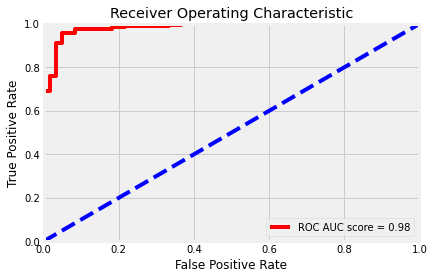

In [111]:
# calcular el FPR y el TPR para todos los umbrales de la clasificación
probs = xgb.predict_proba(X_test)
# Probabilidades positivas
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'red', label = 'ROC AUC score = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5, 1.0, 'Importancia de las características con ganancia media')

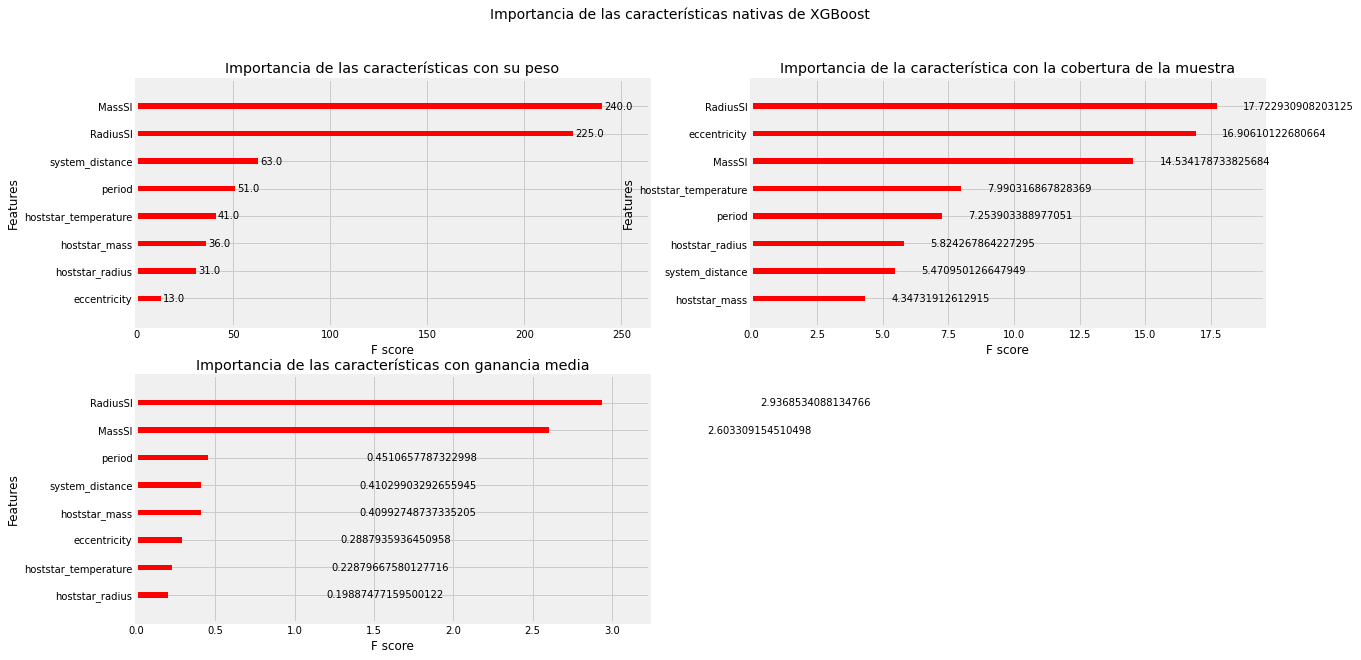

In [128]:
features = cols.columns.to_list()
xgb.get_booster().feature_names=features
# Trazando la importancia de las características de XGBoost
fig = plt.figure(figsize = (18, 10))
title = fig.suptitle("Importancia de las características nativas de XGBoost", fontsize=14)

ax1 = fig.add_subplot(2, 2, 1)
plot_importance(xgb, importance_type='weight', ax=ax1, color='red')
ax1.set_title("Importancia de las características con su peso")

ax2 = fig.add_subplot(2, 2, 2)
plot_importance(xgb, importance_type='cover', ax=ax2, color='red')
ax2.set_title("Importancia de la característica con la cobertura de la muestra")

ax3 = fig.add_subplot(2, 2, 3)
plot_importance(xgb, importance_type='gain', ax=ax3, color='red')
ax3.set_title("Importancia de las características con ganancia media")

## ELI5

In [129]:
import eli5
from eli5.sklearn import PermutationImportance

In [130]:
eli5.show_weights(xgb.get_booster())

Weight,Feature
0.3901,RadiusSI
0.3458,MassSI
0.0599,period
0.0545,system_distance
0.0545,hoststar_mass
0.0384,eccentricity
0.0304,hoststar_temperature
0.0264,hoststar_radius
0,radius
0,mass


## Partial Dependence Plots (PD plot)

In [133]:
pip install wheel

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pdpbox

  Using cached PDPbox-0.2.1-py3-none-any.whl
  Using cached matplotlib-3.1.1.tar.gz (37.8 MB)
  Running setup.py clean for matplotlib
Failed to build matplotlib
  Attempting uninstall: matplotlib
Note: you may need to restart the kernel to use updated packages.    Found existing installation: matplotlib 3.6.2
    Uninstalling matplotlib-3.6.2:
      Successfully uninstalled matplotlib-3.6.2
    Running setup.py install for matplotlib: started
    Running setup.py install for matplotlib: finished with status 'error'
  Rolling back uninstall of matplotlib
  Moving to c:\users\pue\anaconda3\lib\site-packages\matplotlib-3.6.2.dist-info\
   from C:\Users\pue\anaconda3\Lib\site-packages\~atplotlib-3.6.2.dist-info
  Moving to c:\users\pue\anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\dejavusans.ttf
   from C:\Users\pue\AppData\Local\Temp\pip-uninstall-b0b46yx4\dejavusans.ttf
  Moving to c:\users\pue\anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\dejavusansdisplay.ttf
  

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\pue\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\pue\\AppData\\Local\\Temp\\pip-install-atmwmswm\\matplotlib_b3cafd00039844bba801badd4b3d26a6\\setup.py'"'"'; __file__='"'"'C:\\Users\\pue\\AppData\\Local\\Temp\\pip-install-atmwmswm\\matplotlib_b3cafd00039844bba801badd4b3d26a6\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\pue\AppData\Local\Temp\pip-wheel-9t3k33i7'
       cwd: C:\Users\pue\AppData\Local\Temp\pip-install-atmwmswm\matplotlib_b3cafd00039844bba801badd4b3d26a6\
  Complete output (503 lines):
  Edit setup.cfg to change the build options
  
  BUILDING MATPLOTLIB
    matplotlib: yes [3.1.1]
        python: 

  Moving to c:\users\pue\anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\dejavusansmono-boldoblique.ttf
   from C:\Users\pue\AppData\Local\Temp\pip-uninstall-b0b46yx4\dejavusansmono-boldoblique.ttf
  Moving to c:\users\pue\anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\dejavusansmono-oblique.ttf
   from C:\Users\pue\AppData\Local\Temp\pip-uninstall-b0b46yx4\dejavusansmono-oblique.ttf
  Moving to c:\users\pue\anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\dejavusansmono.ttf
   from C:\Users\pue\AppData\Local\Temp\pip-uninstall-b0b46yx4\dejavusansmono.ttf
  Moving to c:\users\pue\anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\dejavuserif-bold.ttf
   from C:\Users\pue\AppData\Local\Temp\pip-uninstall-b0b46yx4\dejavuserif-bold.ttf
  Moving to c:\users\pue\anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\dejavuserif-bolditalic.ttf
   from C:\Users\pue\AppData\Local\Temp\pip-uninstall-b0b46yx4\dejavuserif-bolditalic.ttf
  Moving to c:\users

  copying lib\matplotlib\collections.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\colorbar.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\colors.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\container.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\contour.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\dates.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\docstring.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\dviread.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\figure.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\fontconfig_pattern.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\font_manager.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\gridspec.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\hatch.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matp


   from C:\Users\pue\AppData\Local\Temp\pip-uninstall-b0b46yx4\stixnonunibol.ttf
  Moving to c:\users\pue\anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\stixnonunibolita.ttf
   from C:\Users\pue\AppData\Local\Temp\pip-uninstall-b0b46yx4\stixnonunibolita.ttf
  Moving to c:\users\pue\anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\stixnonuniita.ttf
   from C:\Users\pue\AppData\Local\Temp\pip-uninstall-b0b46yx4\stixnonuniita.ttf
  Moving to c:\users\pue\anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\stixsizfivesymreg.ttf
   from C:\Users\pue\AppData\Local\Temp\pip-uninstall-b0b46yx4\stixsizfivesymreg.ttf
  Moving to c:\users\pue\anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\stixsizfoursymbol.ttf
   from C:\Users\pue\AppData\Local\Temp\pip-uninstall-b0b46yx4\stixsizfoursymbol.ttf
  Moving to c:\users\pue\anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf\stixsizfoursymreg.ttf
   from C:\Users\pue\AppData\Local\Temp\pip-uninstall-b0b46yx4\

  copying lib\matplotlib\offsetbox.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\patches.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\path.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\patheffects.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\pylab.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\pyplot.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\quiver.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\rcsetup.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\sankey.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\scale.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\spines.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\stackplot.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\streamplot.py -> build\lib.win-amd64-3.9\matplotlib
  copying lib\matplotlib\table.py -> b


  Moving to c:\users\pue\anaconda3\lib\site-packages\matplotlib\tests\__pycache__\test_backend_ps.cpython-39.pyc
   from C:\Users\pue\AppData\Local\Temp\pip-uninstall-8eqlh663\tests\__pycache__\test_backend_ps.cpython-39.pyc
  Moving to c:\users\pue\anaconda3\lib\site-packages\matplotlib\tests\__pycache__\test_backend_qt.cpython-39.pyc
   from C:\Users\pue\AppData\Local\Temp\pip-uninstall-8eqlh663\tests\__pycache__\test_backend_qt.cpython-39.pyc
  Moving to c:\users\pue\anaconda3\lib\site-packages\matplotlib\tests\__pycache__\test_backend_svg.cpython-39.pyc
   from C:\Users\pue\AppData\Local\Temp\pip-uninstall-8eqlh663\tests\__pycache__\test_backend_svg.cpython-39.pyc
  Moving to c:\users\pue\anaconda3\lib\site-packages\matplotlib\tests\__pycache__\test_backend_template.cpython-39.pyc
   from C:\Users\pue\AppData\Local\Temp\pip-uninstall-8eqlh663\tests\__pycache__\test_backend_template.cpython-39.pyc
  Moving to c:\users\pue\anaconda3\lib\site-packages\matplotlib\tests\__pycache__\tes

    copying lib\mpl_toolkits\__init__.py -> build\lib.win-amd64-3.9\mpl_toolkits
    creating build\lib.win-amd64-3.9\matplotlib\axes
    copying lib\matplotlib\axes\_axes.py -> build\lib.win-amd64-3.9\matplotlib\axes
    copying lib\matplotlib\axes\_base.py -> build\lib.win-amd64-3.9\matplotlib\axes
    copying lib\matplotlib\axes\_secondary_axes.py -> build\lib.win-amd64-3.9\matplotlib\axes
    copying lib\matplotlib\axes\_subplots.py -> build\lib.win-amd64-3.9\matplotlib\axes
    copying lib\matplotlib\axes\__init__.py -> build\lib.win-amd64-3.9\matplotlib\axes
    creating build\lib.win-amd64-3.9\matplotlib\backends
    copying lib\matplotlib\backends\backend_agg.py -> build\lib.win-amd64-3.9\matplotlib\backends
    copying lib\matplotlib\backends\backend_cairo.py -> build\lib.win-amd64-3.9\matplotlib\backends
    copying lib\matplotlib\backends\backend_gtk3.py -> build\lib.win-amd64-3.9\matplotlib\backends
    copying lib\matplotlib\backends\backend_gtk3agg.py -> build\lib.win-amd


  Moving to c:\users\pue\anaconda3\lib\site-packages\matplotlib\tests\test_backend_svg.py
   from C:\Users\pue\AppData\Local\Temp\pip-uninstall-8eqlh663\tests\test_backend_svg.py
  Moving to c:\users\pue\anaconda3\lib\site-packages\matplotlib\tests\test_backend_template.py
   from C:\Users\pue\AppData\Local\Temp\pip-uninstall-8eqlh663\tests\test_backend_template.py
  Moving to c:\users\pue\anaconda3\lib\site-packages\matplotlib\tests\test_backend_tk.py
   from C:\Users\pue\AppData\Local\Temp\pip-uninstall-8eqlh663\tests\test_backend_tk.py
  Moving to c:\users\pue\anaconda3\lib\site-packages\matplotlib\tests\test_backend_tools.py
   from C:\Users\pue\AppData\Local\Temp\pip-uninstall-8eqlh663\tests\test_backend_tools.py
  Moving to c:\users\pue\anaconda3\lib\site-packages\matplotlib\tests\test_backend_webagg.py
   from C:\Users\pue\AppData\Local\Temp\pip-uninstall-8eqlh663\tests\test_backend_webagg.py
  Moving to c:\users\pue\anaconda3\lib\site-packages\matplotlib\tests\test_backends_in

    copying lib\matplotlib\backends\qt_editor\figureoptions.py -> build\lib.win-amd64-3.9\matplotlib\backends\qt_editor
    copying lib\matplotlib\backends\qt_editor\formlayout.py -> build\lib.win-amd64-3.9\matplotlib\backends\qt_editor
    copying lib\matplotlib\backends\qt_editor\formsubplottool.py -> build\lib.win-amd64-3.9\matplotlib\backends\qt_editor
    copying lib\matplotlib\backends\qt_editor\_formlayout.py -> build\lib.win-amd64-3.9\matplotlib\backends\qt_editor
    copying lib\matplotlib\backends\qt_editor\__init__.py -> build\lib.win-amd64-3.9\matplotlib\backends\qt_editor
    creating build\lib.win-amd64-3.9\matplotlib\testing\jpl_units
    copying lib\matplotlib\testing\jpl_units\Duration.py -> build\lib.win-amd64-3.9\matplotlib\testing\jpl_units
    copying lib\matplotlib\testing\jpl_units\Epoch.py -> build\lib.win-amd64-3.9\matplotlib\testing\jpl_units
    copying lib\matplotlib\testing\jpl_units\EpochConverter.py -> build\lib.win-amd64-3.9\matplotlib\testing\jpl_units



   from C:\Users\pue\AppData\Local\Temp\pip-uninstall-8eqlh663\tests\test_font_manager.py
  Moving to c:\users\pue\anaconda3\lib\site-packages\matplotlib\tests\test_fontconfig_pattern.py
   from C:\Users\pue\AppData\Local\Temp\pip-uninstall-8eqlh663\tests\test_fontconfig_pattern.py
  Moving to c:\users\pue\anaconda3\lib\site-packages\matplotlib\tests\test_ft2font.py
   from C:\Users\pue\AppData\Local\Temp\pip-uninstall-8eqlh663\tests\test_ft2font.py
  Moving to c:\users\pue\anaconda3\lib\site-packages\matplotlib\tests\test_getattr.py
   from C:\Users\pue\AppData\Local\Temp\pip-uninstall-8eqlh663\tests\test_getattr.py
  Moving to c:\users\pue\anaconda3\lib\site-packages\matplotlib\tests\test_gridspec.py
   from C:\Users\pue\AppData\Local\Temp\pip-uninstall-8eqlh663\tests\test_gridspec.py
  Moving to c:\users\pue\anaconda3\lib\site-packages\matplotlib\tests\test_image.py
   from C:\Users\pue\AppData\Local\Temp\pip-uninstall-8eqlh663\tests\test_image.py
  Moving to c:\users\pue\anaconda3

    copying lib\mpl_toolkits\axisartist\floating_axes.py -> build\lib.win-amd64-3.9\mpl_toolkits\axisartist
    copying lib\mpl_toolkits\axisartist\grid_finder.py -> build\lib.win-amd64-3.9\mpl_toolkits\axisartist
    copying lib\mpl_toolkits\axisartist\grid_helper_curvelinear.py -> build\lib.win-amd64-3.9\mpl_toolkits\axisartist
    copying lib\mpl_toolkits\axisartist\parasite_axes.py -> build\lib.win-amd64-3.9\mpl_toolkits\axisartist
    copying lib\mpl_toolkits\axisartist\__init__.py -> build\lib.win-amd64-3.9\mpl_toolkits\axisartist
    creating build\lib.win-amd64-3.9\mpl_toolkits\mplot3d
    copying lib\mpl_toolkits\mplot3d\art3d.py -> build\lib.win-amd64-3.9\mpl_toolkits\mplot3d
    copying lib\mpl_toolkits\mplot3d\axes3d.py -> build\lib.win-amd64-3.9\mpl_toolkits\mplot3d
    copying lib\mpl_toolkits\mplot3d\axis3d.py -> build\lib.win-amd64-3.9\mpl_toolkits\mplot3d
    copying lib\mpl_toolkits\mplot3d\proj3d.py -> build\lib.win-amd64-3.9\mpl_toolkits\mplot3d
    copying lib\mpl_

In [ ]:
conda install -c conda-forge pdpbox

In [5]:
#pip install pdpbox
from pdpbox import pdp, get_dataset, info_plots

ModuleNotFoundError: No module named 'pdpbox'

In [131]:
def plot_pdp(model, df, feature, cluster_flag=False, nb_clusters=None, lines_flag=False):
    
    # Crear los datos que vamos a trazar
    pdp_goals = pdp.pdp_isolate(model=model, dataset=df, model_features=df.columns.tolist(), feature=feature)

    # plot it
    pdp.pdp_plot(pdp_goals, feature, cluster=cluster_flag, n_cluster_centers=nb_clusters, plot_lines=lines_flag)
    plt.show()

In [132]:
plot_pdp(xgb, X_train, 'RadiusSI')

NameError: name 'pdp' is not defined

### Flujo de trabajo : Objeto de interpretación > Modelo en memoria > Interpretación

In [6]:
#pip install --user Skater==1.0.2

  Created wheel for Skater: filename=skater-1.0.2-py3-none-any.whl size=48589 sha256=b3b219d3fee9b3fba7eb10823bda10678e92987236d2131a5f06d94f3a5d2810
  Stored in directory: c:\users\pue\appdata\local\pip\cache\wheels\3b\c6\60\f29aa2e9d26fc1417b27189b8be94e235afef1b848196a738d
  Created wheel for pathos: filename=pathos-0.2.0-py3-none-any.whl size=68492 sha256=1f8964f22c81e232ed2923a5a666b9b2feeb351c4281ebcc859f324c89536309
  Stored in directory: c:\users\pue\appdata\local\pip\cache\wheels\c2\50\f5\64ba297b3dec7e9c9af5fccc609eff2d2291a187c2ea888349
  Created wheel for ds-lime: filename=ds_lime-0.1.1.27-py3-none-any.whl size=261606 sha256=3f5939e27ce4c45bc36b82b7264329f231200793dbc649f5a761918ce98d00c2
  Stored in directory: c:\users\pue\appdata\local\pip\cache\wheels\6e\32\0b\7cea4430c887ca12f7dfc24ba4fc24e90906e8c1105b4e61c5
Successfully built Skater pathos ds-lime
Note: you may need to restart the kernel to use updated packages.


In [15]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

In [8]:
interpreter = Interpretation(training_data=X_test, feature_names=features_list)
im_model = InMemoryModel(xgb.predict_proba, examples=X_train, target_names=['Planeta Grande', 'Planeta Ligero'])

NameError: name 'X_test' is not defined

### Gráficos de dependencia parcial con SKATER

In [ ]:
r = interpreter.partial_dependence.plot_partial_dependence(['radius'], im_model, grid_resolution=50, 
                                                           grid_range=(0,1), n_samples=1000, 
                                                           with_variance=True, figsize = (6, 4), n_jobs=-1)
yl = r[0][1].set_ylim(0, 1)

In [ ]:
r = interpreter.partial_dependence.plot_partial_dependence(['mass'], im_model, grid_resolution=50, 
                                                           grid_range=(0,1), n_samples=1000, 
                                                           with_variance=True, figsize = (6, 4), n_jobs=-1)
yl = r[0][1].set_ylim(0, 1)

### Gráfico PD bivariante que muestra las interacciones entre las características "radius" y "mass" y su efecto en "Densidad".

In [ ]:

plots_list = interpreter.partial_dependence.plot_partial_dependence([('radius', 'mass')], 
                                                                    im_model, grid_range=(0,1), 
                                                                    n_samples=1000,
                                                                    figsize=(16, 6),
                                                                    grid_resolution=100,
                                                                    progressbar=True,
                                                                    n_jobs=-1)

## predicciones del modelo con Skater usando LIME

In [ ]:
predictions = xgb_array.predict_proba(X_test.values)
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer

exp = LimeTabularExplainer(X_test.values, feature_names=features_list, discretize_continuous=True, class_names=['Planeta Grande', 'Planeta Ligero'])

In [2]:
#Buscamos una fila para comprobar el resultado
f_planeta = 1
y_test.iloc[f_planeta]

NameError: name 'y_test' is not defined

In [ ]:

print('Reference:', y_test.iloc[f_planeta])
print('Predicted:', predictions[f_planeta])
exp.explain_instance(X_test.iloc[f_planeta].values, xgb_array.predict_proba).show_in_notebook()

In [ ]:
#Buscamos una fila para comprobar el resultado
f_planeta = 4
y_test.iloc[f_planeta]

In [ ]:
print('Reference:', y_test.iloc[f_planeta])
print('Predicted:', predictions[f_planeta])
exp.explain_instance(X_test.iloc[f_planeta].values, xgb_array.predict_proba).show_in_notebook()

## predicciones con SHAP

In [13]:
pip install shap


  Using cached shap-0.41.0-cp39-cp39-win_amd64.whl (435 kB)
  Using cached numba-0.56.4-cp39-cp39-win_amd64.whl (2.5 MB)
  Using cached cloudpickle-2.2.0-py3-none-any.whl (25 kB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
  Using cached llvmlite-0.39.1-cp39-cp39-win_amd64.whl (23.2 MB)


In [14]:
# pip install shap
import shap

# load JS visualization code to notebook
shap.initjs()

C:\Users\pue\anaconda3\envs\new_Env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# explicar las predicciones del modelo utilizando los valores SHAP
# (la misma sintaxis funciona para los modelos LightGBM, CatBoost y scikit-learn)
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

In [ ]:
X_shap = pd.DataFrame(shap_values)
X_shap.tail()

In [ ]:
print('Expected Value: ', explainer.expected_value)

### Importancia de las características con SHAP


In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar", color='red')

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X_test.iloc[:1000,:])

## SHAP Summary Plot


In [ ]:
shap.force_plot(explainer.expected_value, shap_values[:1000,:], X_test.iloc[:1000,:])

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
shap.dependence_plot(ind='radius', interaction_index='mass',
                 shap_values=shap_values, 
                 features=X_test,  
                 display_features=X_test)